In [9]:
from sys import prefix
import pandas as pd
import random
import os
import shutil
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import math

mapping1 = {10: 0, 12: 1, 14: 2, 16: 3, 18: 4, 20: 5, 22: 6, 24: 7, 26: 8, 28: 9, 30: 10}
mapping2 = {500: 0, 1000: 1, 1500: 2, 2000: 3, 2500: 4, 3000: 5, 3500: 6, 4000: 7, 4500: 8, 5000: 9, 5500: 10, 6000: 11}
mapping3 = {3: 0, 4: 1, 5: 2, 7: 3, 8: 4, 9: 5}

def to_index(input_value, mapping = mapping1):
    return mapping.get(input_value, None)

def get_data(result1 = 'results', result2 = '', map_index = 1):
    mapping = None
    if map_index == 0:
        mapping = mapping1
    elif map_index == 1:
        mapping = mapping2
    elif map_index == 2:
        mapping = mapping3
    time1 = [[0 for i in range(10)] for i in range(len(mapping))]
    for result in tqdm(os.listdir(result1)):
        result_path = os.path.join(result1, result)
        index = int(result.split('.')[0])-1
        with open(result_path) as f:
            while f.readline():
                info = f.readline()[:-1]
                if 'find answer' in info:
                    info = f.readline()
                    key = int(info.split(' ')[0].split('/')[-1].split('.')[0].split('t')[-1])
                    time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                    time1[to_index(key, mapping)][index] = time
                else:
                    key = int(info.split(' ')[0].split('/')[-1].split('.')[0].split('t')[-1])
                    time = 1000.0
                    time1[to_index(key, mapping)][index] = time            
    time1 = [x for a in time1 for x in a]
    
    time2 = [[0 for i in range(10)] for i in range(len(mapping))]
    for result in tqdm(os.listdir(result2)):
        result_path = os.path.join(result2, result)
        index = int(result.split('.')[0])-1
        with open(result_path) as f:
            while f.readline():
                info = f.readline()[:-1]
                if 'find answer' in info:
                    info = f.readline()
                    key = int(info.split(' ')[0].split('/')[-1].split('.')[0].split('t')[-1])
                    time = int(info.split(' : ')[-1].split(' ')[0]) / 1000.0
                    time2[to_index(key, mapping)][index] = time
                else:
                    key = int(info.split(' ')[0].split('/')[-1].split('.')[0].split('t')[-1])
                    time = 1000.0
                    time2[to_index(key, mapping)][index] = time
    time2 = [x for a in time2 for x in a]

    X = [[], []]
    Y = [[], []]
    for x, y in zip(time1, time2):
        if x < 1000 and y < 1000 and x > 0 and y > 0:
            X[0].append(x)
            X[1].append(y)
        else:
            # if x == 0 or y == 0:
            #     x = 1000
            #     y = 1000
            Y[0].append(x)
            Y[1].append(y)
    print(len(X[0]))
    print(len(Y[0]))
    return X, Y

In [10]:
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import sys

problem_map = ['AI_ls', 'nqueens_ls', 'MOLS_ls']
color_map = ['purple', 'peru', 'green']
mark_map = ['x', '+', 'o']
label_map = ['All-Interval', 'N-Queens', '2-MOLS']

def get_compare(a, b, type='log'):
    # 生成图形
    plt.figure(figsize=(3.5, 3.5))
    
    # 生成数据
    for i in range(3):
        aa = f'../results/{problem_map[i]}'
        bb = f'../results/{problem_map[i]}_{b}'
        X, Y = get_data(aa, bb, i)    
        plt.scatter(X[0], X[1], s=1, c=color_map[i], marker=mark_map[i], linewidth=10, alpha=0.7, label=label_map[i])
        plt.scatter(Y[0], Y[1], s=1, c=color_map[i], marker=mark_map[i], linewidth=10, alpha=0.7)
    x = [i for i in range(0, 1200)]
    plt.plot(x, x, c='black', linewidth=0.5)

    # 显示图形
    plt.xlabel('AllDiff-LS' + ' (s)') # 横坐标轴的标题
    plt.ylabel('AllDiff-LS-' + b.upper() + ' (s)') # 纵坐标轴的标题
    plt.legend(loc='lower right')
    # plt.tight_layout()
    
    if type == 'log':
        plt.xlim(1, 1200)
        plt.ylim(1, 1200)
        plt.xscale('symlog')
        plt.yscale('symlog')
        plt.axhline(y=10,ls=":",c="gray")
        plt.axhline(y=100,ls=":",c="gray")
        
        plt.axvline(x=10,ls=":",c="gray")
        plt.axvline(x=100,ls=":",c="gray")
    else:
        plt.xlim(1, 1020)
        plt.ylim(1, 1020)
        plt.axhline(y=200,ls=":",c="gray")
        plt.axhline(y=400,ls=":",c="gray")
        plt.axhline(y=600,ls=":",c="gray")
        plt.axhline(y=800,ls=":",c="gray")
        # plt.axhline(y=1000,ls=":",c="gray")
        
        plt.axvline(x=200,ls=":",c="gray")
        plt.axvline(x=400,ls=":",c="gray")
        plt.axvline(x=600,ls=":",c="gray")
        plt.axvline(x=800,ls=":",c="gray")
        # plt.axvline(x=1000,ls=":",c="gray")

    if type == 'log':
        plt.savefig('../charts/'+ 'LS' + '_VS_' + b.upper() + '(log)' +'.pdf', bbox_inches='tight')
    else:
        plt.savefig('../charts/'+ 'LS' + '_VS_' + b.upper() + '.pdf', bbox_inches='tight')
    plt.show()
    # plt.close()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

79
31


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

120
0


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

42
18


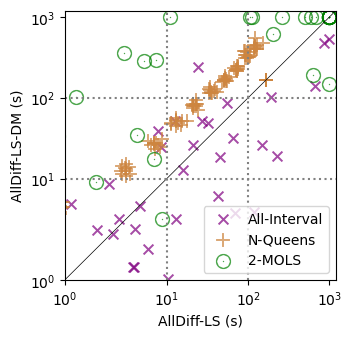

In [11]:
get_compare('', 'DM', type='log')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

79
31


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

120
0


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

47
13


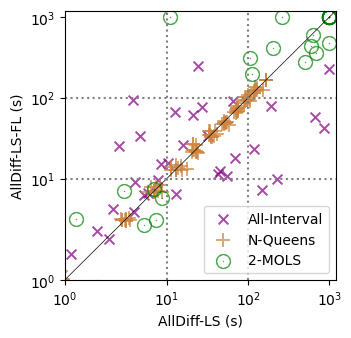

In [12]:
get_compare('', 'FL', type='log')